# Phân tích dữ liệu bệnh tiểu đường (Pima Indians Diabetes Dataset)

Notebook này được xây dựng dựa trên mẫu phân tích dữ liệu hoa Iris, 
nhưng điều chỉnh để phù hợp với bộ dữ liệu y tế dự đoán bệnh tiểu đường.

**Mục tiêu**:
- Khám phá dữ liệu y tế của 768 phụ nữ Pima Indian.
- Xác định yếu tố ảnh hưởng đến nguy cơ mắc tiểu đường.
- Xây dựng mô hình Logistic Regression để phân loại nguy cơ.


## 1. Định nghĩa vấn đề

Bệnh tiểu đường (Diabetes Mellitus) là một trong những bệnh mãn tính phổ biến nhất trên thế giới,
ảnh hưởng nghiêm trọng đến sức khỏe và chất lượng cuộc sống. Việc dự đoán sớm nguy cơ mắc bệnh
có ý nghĩa quan trọng trong y tế, giúp người bệnh có thể thay đổi lối sống hoặc được can thiệp kịp thời.

**Bộ dữ liệu Pima Indians Diabetes** được xây dựng dựa trên thông tin y tế của **768 phụ nữ gốc Pima Indian**
trên 21 tuổi, sống tại Arizona (Mỹ). Bộ dữ liệu gồm **8 đặc trưng** đầu vào và **1 nhãn mục tiêu**:

- Pregnancies: số lần mang thai  
- Glucose: nồng độ glucose huyết tương sau 2 giờ trong nghiệm pháp dung nạp glucose  
- BloodPressure: huyết áp tâm trương (mm Hg)  
- SkinThickness: độ dày lớp da dưới cánh tay (mm)  
- Insulin: nồng độ insulin huyết thanh (mu U/ml)  
- BMI: chỉ số khối cơ thể (cân nặng/chiều cao²)  
- DiabetesPedigreeFunction: chỉ số dự đoán nguy cơ di truyền tiểu đường  
- Age: tuổi (năm)  
- Outcome: biến mục tiêu (0 = không mắc bệnh, 1 = mắc bệnh)

**Bài toán**:  
- Đây là một bài toán **phân loại nhị phân** (binary classification).  
- Mục tiêu là xây dựng mô hình dự đoán khả năng mắc tiểu đường (Outcome = 1) dựa trên các biến y tế.  

**Ý nghĩa thực tiễn**:  
- Giúp bác sĩ và bệnh nhân có công cụ hỗ trợ ra quyết định.  
- Giúp phát hiện sớm nguy cơ, từ đó đưa ra giải pháp can thiệp phòng ngừa.  


# 2. Chuẩn bị vấn đề

## 2.1 Khai báo thư viện

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

warnings.filterwarnings("ignore")

## 2.2 Nạp dữ liệu

In [8]:
# Load dataset
data_path  = "pima-indians-diabetes.csv"
data_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
			  "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df_dataset = pd.read_csv(data_path, names = data_names)

# 3. Phân tích dữ liệu

# 3.1 Thống kê mô tả

#### (1) Hiển thị thông tin dữ liệu

Trước khi tiến hành phân tích và xây dựng mô hình, chúng ta cần quan sát một số thông tin cơ bản của bộ dữ liệu:

- Kiểu dữ liệu và số lượng giá trị không rỗng (non-null).
- Thống kê mô tả các thuộc tính.
- Phân bố nhãn đầu ra (Outcome: 0 = không tiểu đường, 1 = có tiểu đường).


=== Thông tin chung của dữ liệu ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

=== Thống kê mô tả ===
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120

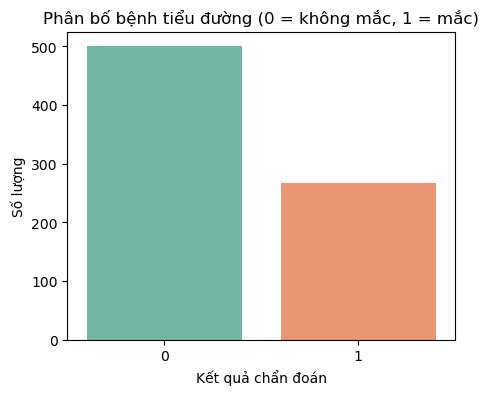


=== Tỷ lệ phần trăm từng lớp ===
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Đặt tên cột
df_dataset.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
                      "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Thông tin tổng quát
print("=== Thông tin chung của dữ liệu ===")
print(df_dataset.info())

# Thống kê mô tả
print("\n=== Thống kê mô tả ===")
print(df_dataset.describe())

# Kiểm tra phân bố nhãn đầu ra
plt.figure(figsize=(5,4))
sns.countplot(x="Outcome", data=df_dataset, palette="Set2")
plt.title("Phân bố bệnh tiểu đường (0 = không mắc, 1 = mắc)")
plt.xlabel("Kết quả chẩn đoán")
plt.ylabel("Số lượng")
plt.show()

# Tỷ lệ %
outcome_counts = df_dataset["Outcome"].value_counts(normalize=True) * 100
print("\n=== Tỷ lệ phần trăm từng lớp ===")
print(outcome_counts)


#### Nhận xét sơ bộ
- Dữ liệu gồm 768 quan sát, mỗi quan sát có 8 đặc trưng y tế và 1 nhãn đầu ra.
- Một số biến có giá trị bất thường (ví dụ: Glucose, BloodPressure, Insulin có thể bằng 0).
- Tập dữ liệu **không cân bằng**: số người **không mắc tiểu đường (Outcome=0)** chiếm tỷ lệ lớn hơn so với số người **mắc bệnh (Outcome=1)**.
- Điều này ảnh hưởng đến việc huấn luyện mô hình, do đó cần lưu ý đến kỹ thuật xử lý mất cân bằng dữ liệu (như SMOTE).


#### (2) Kiểm tra tính toàn vẹn dữ liệu

Trước khi tiến hành phân tích, cần kiểm tra chất lượng và tính toàn vẹn của dữ liệu:

- Có giá trị thiếu (NaN) hay không?
- Có giá trị bất thường (ví dụ bằng 0 ở những cột không hợp lý về mặt y học)?
- Phân bố của các đặc trưng ra sao?


In [10]:
# Kiểm tra giá trị thiếu
print("=== Kiểm tra giá trị thiếu ===")
print(df_dataset.isnull().sum())

# Kiểm tra có bao nhiêu giá trị bằng 0 trong các cột quan trọng
cols_check = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_check:
    zero_count = (df_dataset[col] == 0).sum()
    print(f"Cột {col} có {zero_count} giá trị bằng 0")

# Tỷ lệ % giá trị bằng 0
print("\n=== Tỷ lệ giá trị bằng 0 trên toàn bộ dữ liệu ===")
for col in cols_check:
    zero_pct = (df_dataset[col] == 0).mean() * 100
    print(f"{col}: {zero_pct:.2f}%")


=== Kiểm tra giá trị thiếu ===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Cột Glucose có 5 giá trị bằng 0
Cột BloodPressure có 35 giá trị bằng 0
Cột SkinThickness có 227 giá trị bằng 0
Cột Insulin có 374 giá trị bằng 0
Cột BMI có 11 giá trị bằng 0

=== Tỷ lệ giá trị bằng 0 trên toàn bộ dữ liệu ===
Glucose: 0.65%
BloodPressure: 4.56%
SkinThickness: 29.56%
Insulin: 48.70%
BMI: 1.43%


#### Nhận xét về tính toàn vẹn
- Bộ dữ liệu không chứa giá trị thiếu (NaN), nhưng có nhiều giá trị bằng **0** ở các biến không hợp lý:
  - `Glucose` và `BloodPressure` có một số trường hợp bằng 0 (trong thực tế y khoa gần như không thể).
  - `Insulin` và `SkinThickness` có rất nhiều giá trị bằng 0 (có thể do chưa được đo).
  - `BMI` cũng có một số trường hợp bằng 0, điều này không thực tế.

- Các giá trị này cần được xử lý ở bước tiền xử lý (ví dụ: thay thế bằng giá trị trung vị, trung bình hoặc áp dụng mô hình nội suy).


#### (3) Các tính chất thống kê của dữ liệu số

Để hiểu rõ hơn về dữ liệu, ta sẽ phân tích thống kê mô tả cho các đặc trưng số.
Mục tiêu:
- Nắm được xu hướng trung tâm (mean, median).
- Đánh giá mức độ phân tán (standard deviation).
- Quan sát sự khác biệt thống kê giữa nhóm không mắc bệnh (Outcome=0) và nhóm mắc bệnh (Outcome=1).


In [11]:
# Thống kê mô tả chung cho tất cả dữ liệu
stats_summary = df_dataset.describe().T
stats_summary["median"] = df_dataset.median()
stats_summary = stats_summary[["mean", "median", "std", "min", "25%", "50%", "75%", "max"]]
print("=== Thống kê mô tả toàn bộ dữ liệu ===")
print(stats_summary)


=== Thống kê mô tả toàn bộ dữ liệu ===
                                mean    median         std     min       25%  \
Pregnancies                 3.845052    3.0000    3.369578   0.000   1.00000   
Glucose                   120.894531  117.0000   31.972618   0.000  99.00000   
BloodPressure              69.105469   72.0000   19.355807   0.000  62.00000   
SkinThickness              20.536458   23.0000   15.952218   0.000   0.00000   
Insulin                    79.799479   30.5000  115.244002   0.000   0.00000   
BMI                        31.992578   32.0000    7.884160   0.000  27.30000   
DiabetesPedigreeFunction    0.471876    0.3725    0.331329   0.078   0.24375   
Age                        33.240885   29.0000   11.760232  21.000  24.00000   
Outcome                     0.348958    0.0000    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  1

In [12]:
# Tính thống kê mô tả cho từng nhóm Outcome
group_stats = df_dataset.groupby("Outcome").agg(["mean", "median", "std"])
print("=== Thống kê theo nhóm Outcome (0 = không mắc, 1 = mắc) ===")
print(group_stats.T)


=== Thống kê theo nhóm Outcome (0 = không mắc, 1 = mắc) ===
Outcome                                   0           1
Pregnancies              mean      3.298000    4.865672
                         median    2.000000    4.000000
                         std       3.017185    3.741239
Glucose                  mean    109.980000  141.257463
                         median  107.000000  140.000000
                         std      26.141200   31.939622
BloodPressure            mean     68.184000   70.824627
                         median   70.000000   74.000000
                         std      18.063075   21.491812
SkinThickness            mean     19.664000   22.164179
                         median   21.000000   27.000000
                         std      14.889947   17.679711
Insulin                  mean     68.792000  100.335821
                         median   39.000000    0.000000
                         std      98.865289  138.689125
BMI                      mean     30.304200 

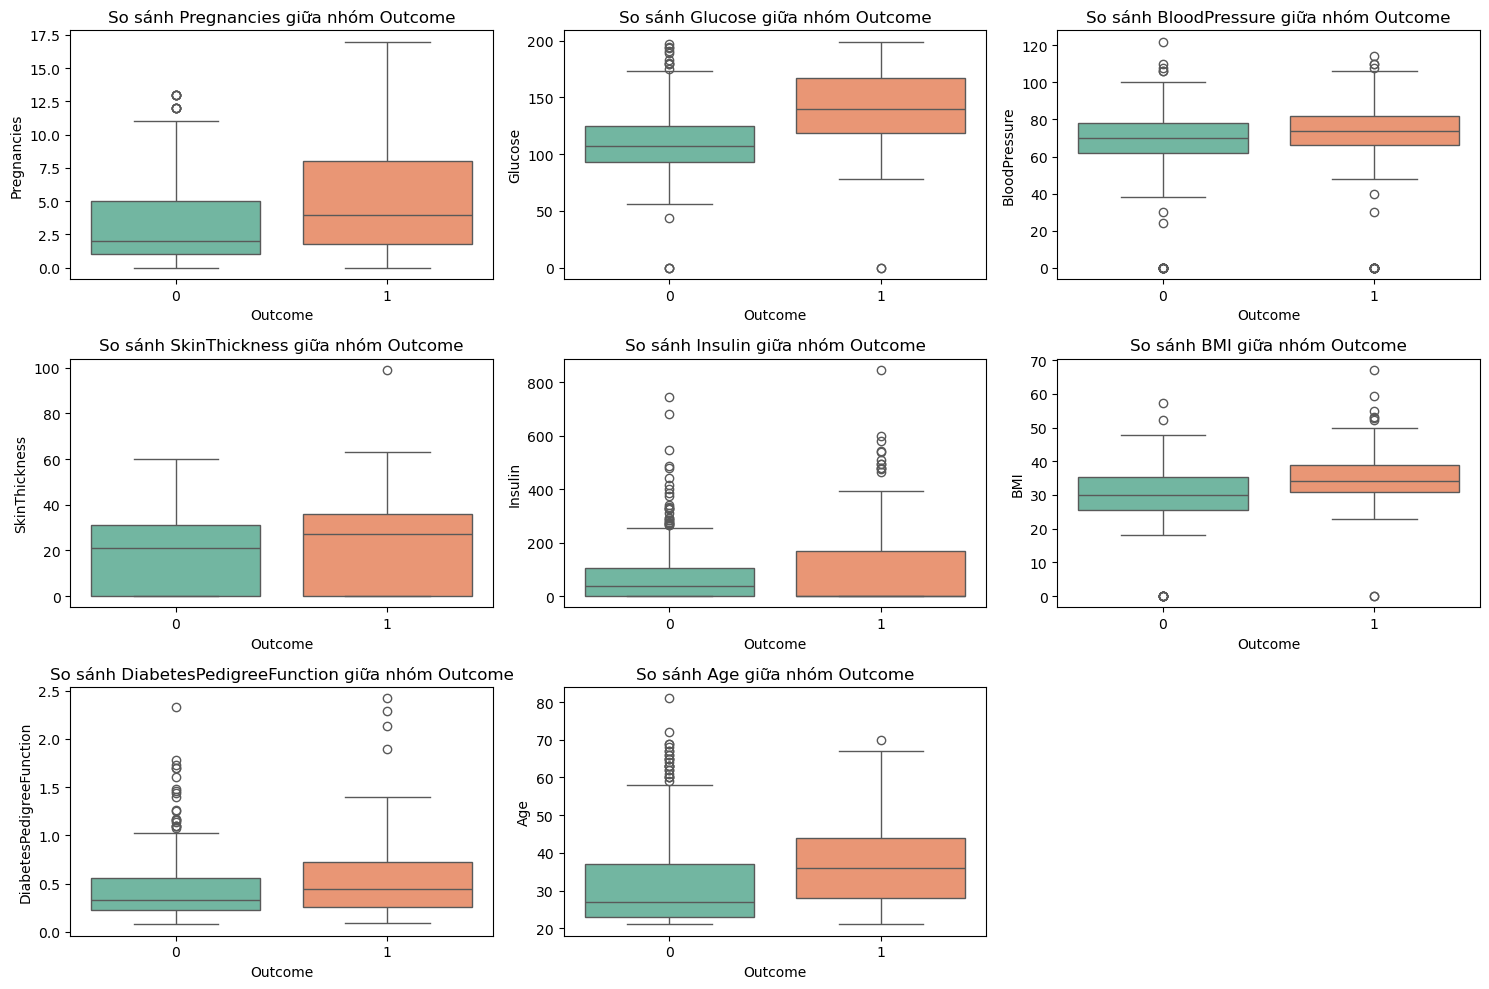

In [13]:
# Boxplot để so sánh phân phối giữa hai nhóm
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
for i, col in enumerate(df_dataset.columns[:-1], 1):
    plt.subplot(3,3,i)
    sns.boxplot(x="Outcome", y=col, data=df_dataset, palette="Set2")
    plt.title(f"So sánh {col} giữa nhóm Outcome")
plt.tight_layout()
plt.show()


#### Nhận xét từ thống kê mô tả
- `Glucose` trung bình ở nhóm mắc tiểu đường (Outcome=1) **cao hơn rõ rệt** so với nhóm không mắc.
- `BMI` và `DiabetesPedigreeFunction` cũng có xu hướng cao hơn ở nhóm mắc bệnh.
- `Age` trung bình ở nhóm mắc bệnh cao hơn → người lớn tuổi có nguy cơ cao hơn.
- `BloodPressure`, `SkinThickness`, `Insulin` ít khác biệt hơn, nhưng vẫn tồn tại sự chênh lệch.

Những kết quả này cho thấy các biến **Glucose, BMI, DiabetesPedigreeFunction, Age** có thể là yếu tố quan trọng trong dự đoán bệnh tiểu đường.


#### (4) Tần số xuất hiện trong dữ liệu phân lớp

Để kiểm tra mức độ cân bằng của nhãn phân loại và đặc tính rời rạc,
chúng ta tính tần số xuất hiện của:

- Nhãn mục tiêu `Outcome` (0 = không tiểu đường, 1 = tiểu đường).
- Biến `Pregnancies` (số lần mang thai), vì đây là biến rời rạc.


=== Tần số Outcome ===
Outcome
0    500
1    268
Name: count, dtype: int64

=== Tỷ lệ phần trăm Outcome ===
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


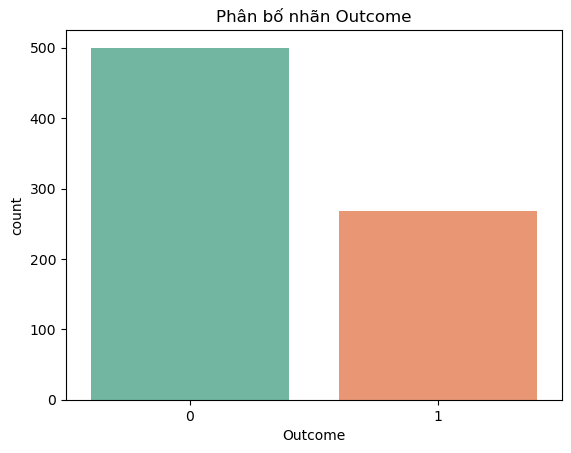


=== Tần số số lần mang thai (Pregnancies) ===
Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: count, dtype: int64


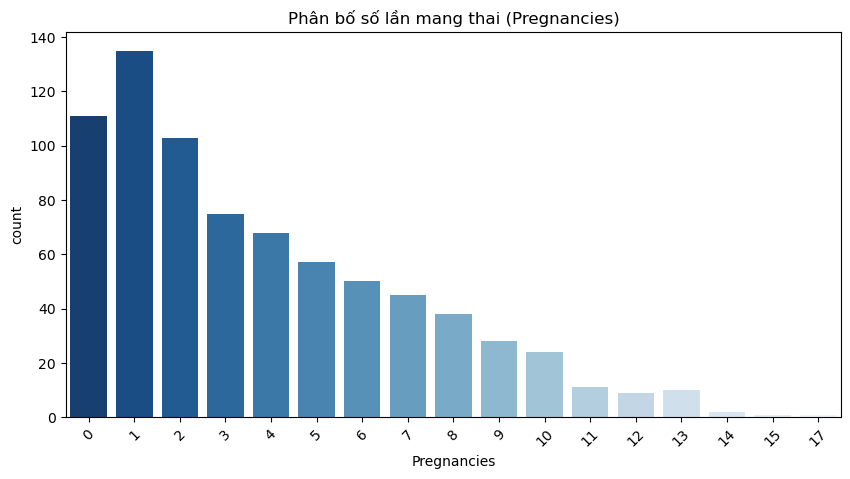

In [14]:
# Tần số xuất hiện của Outcome
print("=== Tần số Outcome ===")
print(df_dataset["Outcome"].value_counts())
print("\n=== Tỷ lệ phần trăm Outcome ===")
print(df_dataset["Outcome"].value_counts(normalize=True) * 100)

# Biểu đồ tần số Outcome
sns.countplot(x="Outcome", data=df_dataset, palette="Set2")
plt.title("Phân bố nhãn Outcome")
plt.show()

# Tần số xuất hiện của Pregnancies
print("\n=== Tần số số lần mang thai (Pregnancies) ===")
print(df_dataset["Pregnancies"].value_counts().sort_index())

# Biểu đồ tần số Pregnancies
plt.figure(figsize=(10,5))
sns.countplot(x="Pregnancies", data=df_dataset, palette="Blues_r")
plt.title("Phân bố số lần mang thai (Pregnancies)")
plt.xticks(rotation=45)
plt.show()


#### Nhận xét
- Nhãn mục tiêu (`Outcome`) **không cân bằng**: khoảng 65% không mắc bệnh, 35% mắc bệnh.
- Biến `Pregnancies` có giá trị phổ biến từ 0 đến 6, số lượng trên 10 ít gặp.
- Điều này cho thấy dữ liệu cần xử lý mất cân bằng (ví dụ: SMOTE) trước khi huấn luyện mô hình.


#### (5) Mối tương quan giữa các thuộc tính

Để đánh giá mối quan hệ tuyến tính giữa các biến số trong bộ dữ liệu,
chúng ta sử dụng **ma trận tương quan (correlation matrix)**.
Mục tiêu:
- Xác định biến nào có mối liên hệ mạnh với nhãn `Outcome`.
- Kiểm tra sự phụ thuộc giữa các đặc trưng để tránh trùng lặp thông tin khi huấn luyện mô hình.


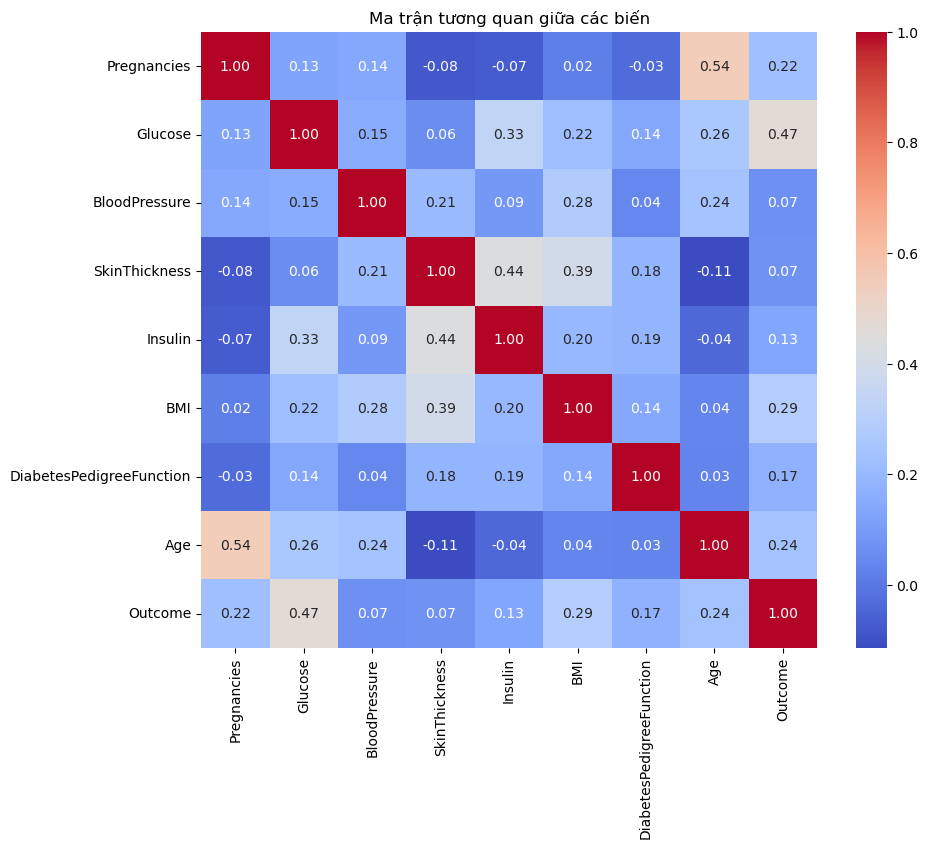

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan
corr = df_dataset.corr()

# Vẽ heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, square=True)
plt.title("Ma trận tương quan giữa các biến")
plt.show()


In [16]:
# Hiển thị các hệ số tương quan của từng biến với Outcome
outcome_corr = corr["Outcome"].sort_values(ascending=False)
print("=== Tương quan của các biến với Outcome ===")
print(outcome_corr)


=== Tương quan của các biến với Outcome ===
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


#### Nhận xét từ ma trận tương quan
- `Glucose` có mối tương quan dương mạnh nhất với `Outcome` (~0.47) → đây là yếu tố quan trọng nhất trong dự đoán tiểu đường.
- `BMI`, `Age` và `DiabetesPedigreeFunction` cũng có tương quan dương đáng kể với `Outcome`.
- `Pregnancies` có mối tương quan dương vừa phải với `Outcome`, cho thấy số lần mang thai nhiều có thể làm tăng nguy cơ mắc bệnh.
- `BloodPressure`, `SkinThickness` và `Insulin` có tương quan yếu với `Outcome`.
- Giữa các biến độc lập, hầu hết có tương quan thấp → ít nguy cơ đa cộng tuyến, mô hình có thể hoạt động tốt.


## 3.2 Hiển thị dữ liệu

Trước tiên, chúng ta sẽ xem qua một số thông tin cơ bản của tập dữ liệu Pima Indians Diabetes:

- Xem vài dòng đầu tiên để nắm cấu trúc dữ liệu.
- Kiểm tra số hàng, cột, kiểu dữ liệu và giá trị không rỗng.
- Thống kê mô tả các thuộc tính số.
- Quan sát phân bố nhãn mục tiêu `Outcome`.


#### (1) Hiển thị từng tính chất kèm phân bố (Histogram & Boxplot)

Mục tiêu:  
- Quan sát phân bố dữ liệu của từng đặc trưng (feature).  
- Nhận diện giá trị ngoại lệ (outlier) và hình dạng phân bố.  


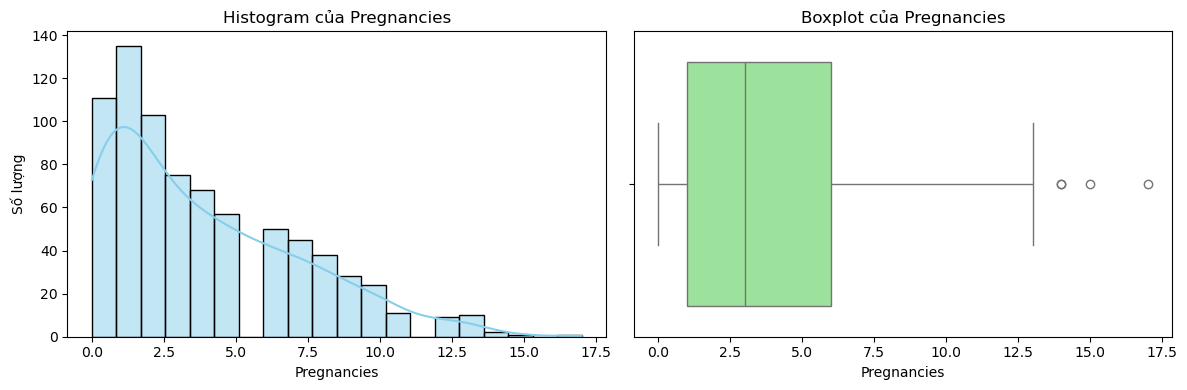

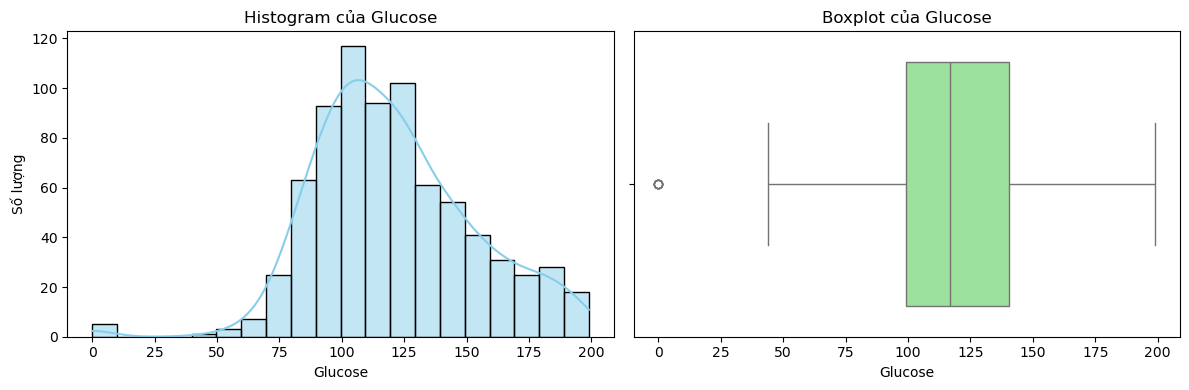

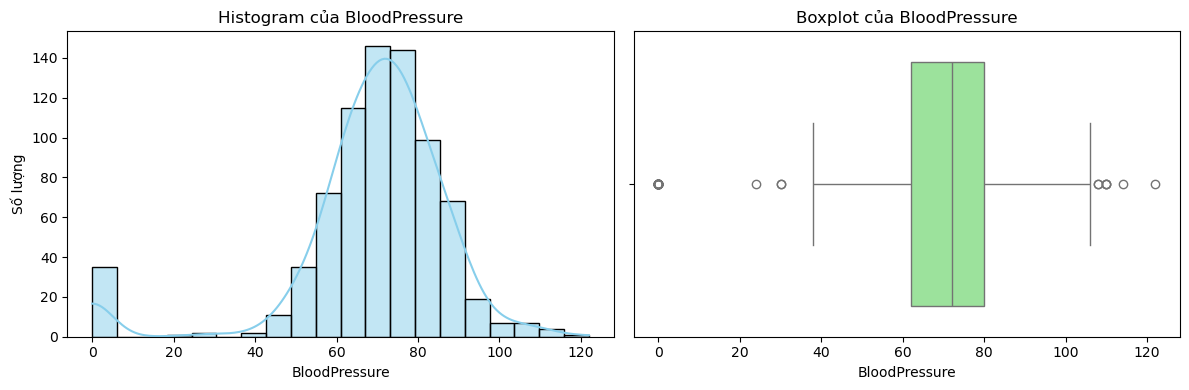

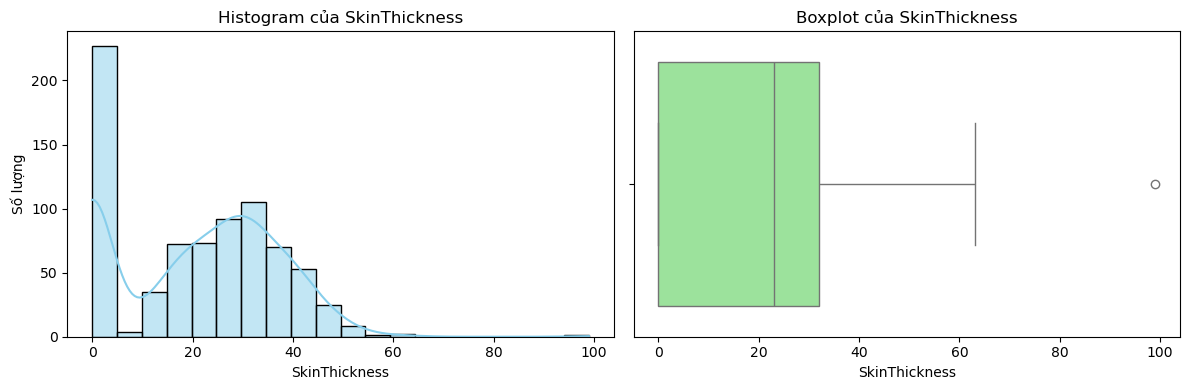

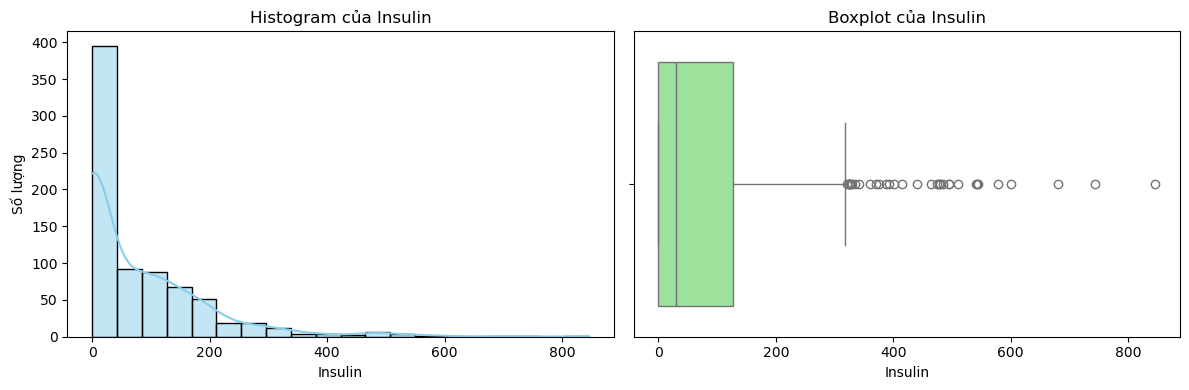

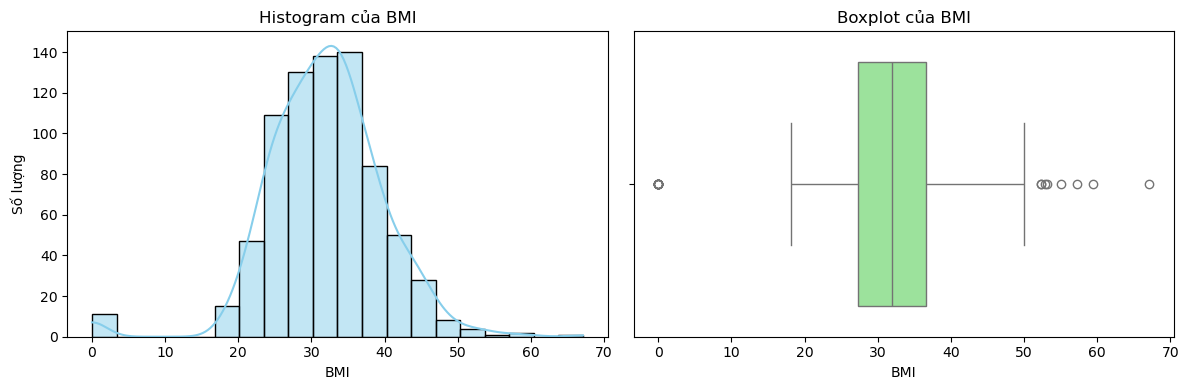

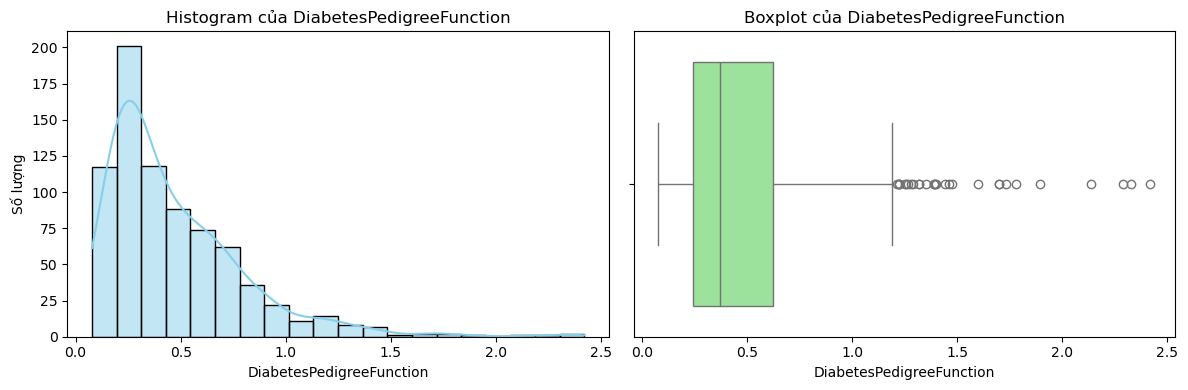

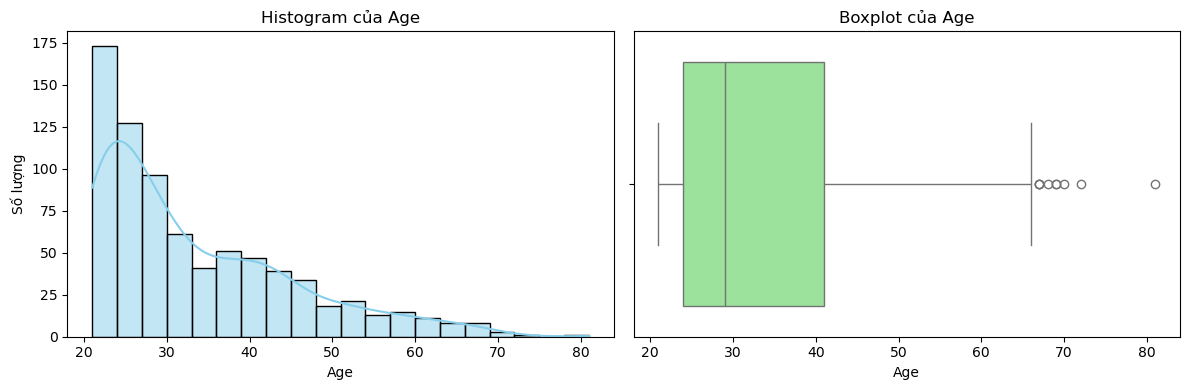

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các cột số (ngoại trừ Outcome)
num_cols = df_dataset.columns[:-1]

# Vẽ histogram + boxplot cho từng cột
for col in num_cols:
    plt.figure(figsize=(12,4))
    
    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df_dataset[col], bins=20, kde=True, color='skyblue')
    plt.title(f"Histogram của {col}")
    plt.xlabel(col)
    plt.ylabel("Số lượng")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df_dataset[col], color='lightgreen')
    plt.title(f"Boxplot của {col}")
    
    plt.tight_layout()
    plt.show()


#### Giải thích trực quan

- **Histogram**: Cho thấy phân bố dữ liệu của cột, có thể nhận thấy:
  - Dữ liệu tập trung hay phân tán.  
  - Lệch trái/phải của phân phối.  

- **Boxplot**: Giúp nhận dạng:
  - Median (trung vị) của dữ liệu.  
  - Hộp (IQR) thể hiện độ phân tán dữ liệu.  
  - Whiskers và ngoại lệ (outlier) nằm ngoài phạm vi rìa.  

Ví dụ quan sát:  
- `Glucose` và `BMI` có thể có một số giá trị ngoại lệ cao.  
- `Insulin` thường lệch phải, nhiều giá trị lớn bất thường.  
- `Pregnancies` có dữ liệu tập trung nhiều ở giá trị thấp, ít biến thiên.


#### (2) Hiển thị nhiều tính chất

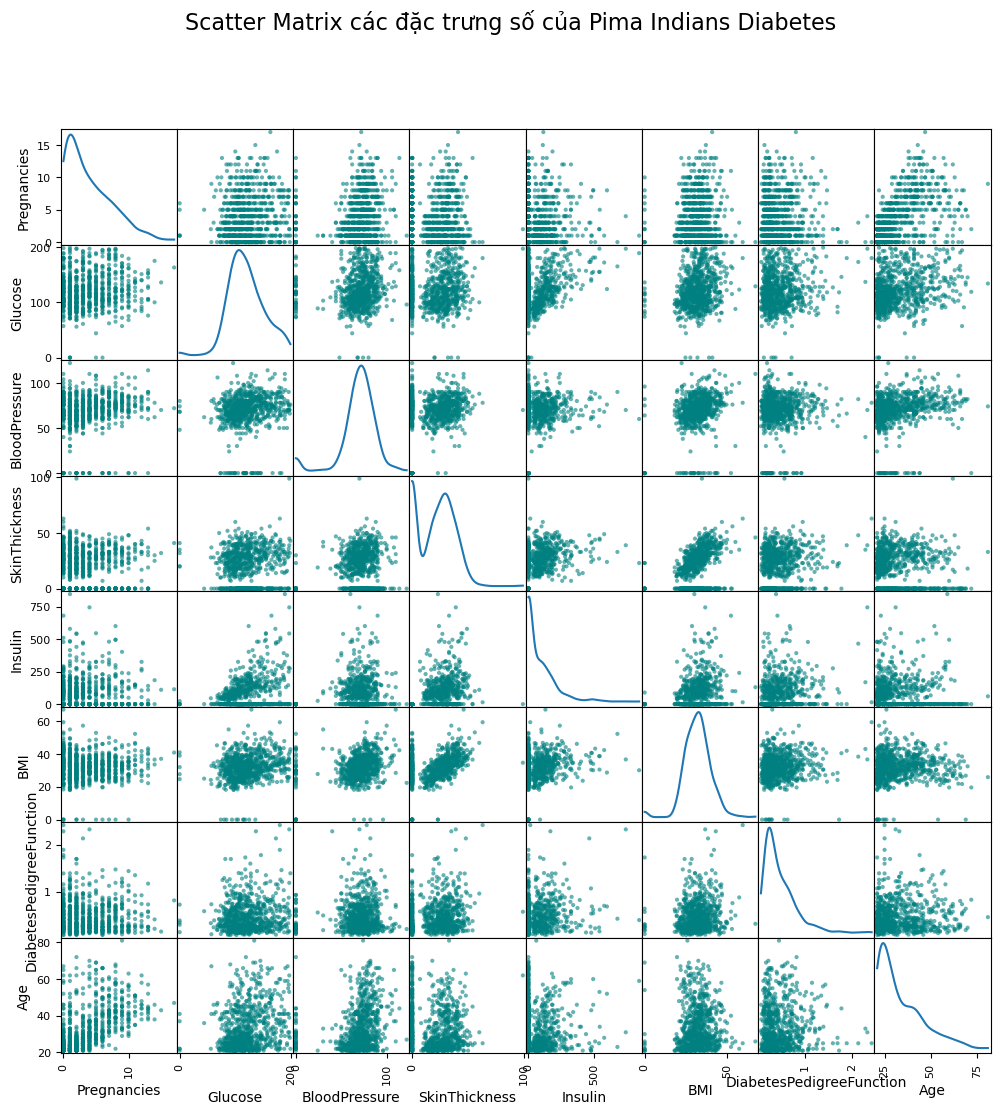

In [18]:
# Vẽ scatter matrix
pd.plotting.scatter_matrix(df_dataset[num_cols], figsize=(12, 12), diagonal='kde', alpha=0.6, color='teal')

plt.suptitle("Scatter Matrix các đặc trưng số của Pima Indians Diabetes", fontsize=16)
plt.show()


#### Nhận xét từ scatter matrix
- Scatter matrix giúp quan sát mối quan hệ giữa các đặc trưng số:  
  - Một số đặc trưng như `Glucose` và `BMI` có tương quan nhẹ.  
  - Nhìn chung các đặc trưng chưa có mối tương quan mạnh, phù hợp cho việc áp dụng các mô hình học máy.  
- Có thể sử dụng màu sắc theo Outcome để quan sát sự phân tách giữa bệnh nhân tiểu đường và không tiểu đường trong không gian các đặc trưng.

<Figure size 1000x800 with 0 Axes>

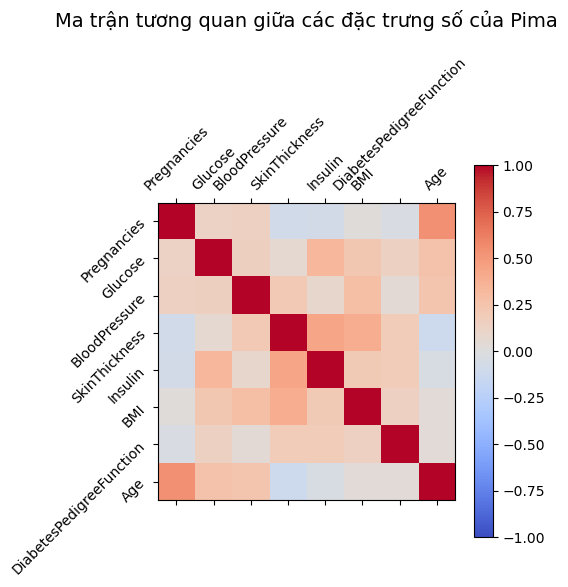

In [19]:
# Tính ma trận tương quan
correlations = df_dataset[num_cols].corr()

# Vẽ ma trận tương quan
plt.figure(figsize=(10,8))
plt.matshow(correlations, vmin=-1, vmax=1, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(len(num_cols)), num_cols, rotation=45)
plt.yticks(np.arange(len(num_cols)), num_cols, rotation=45)
plt.title("Ma trận tương quan giữa các đặc trưng số của Pima", pad=20, fontsize=14)
plt.show()

# 4. Chuẩn bị dữ liệu

### 4.1 Làm sạch dữ liệu

#### (1) Tạo bảng dữ liệu sạch
+ Chỉ giữ lại các cột Input, Ouput

In [20]:
df_clean = df_dataset.copy()

#### (2) **Xử lý các giá trị rỗng không hợp lệ**

In [21]:
# Kiểm tra Null và NaN
has_null = df_dataset.isnull().sum().any()
has_nan  = df_dataset.isna().sum().any()

print(f'+ Có giá trị Null: {has_null}')
if has_null:
    print("Các dòng chứa giá trị Null:")
    display(df_dataset[df_dataset.isnull().any(axis=1)])

print(f'+ Có giá trị NaN: {has_nan}')
if has_nan:
    print("Các dòng chứa giá trị NaN:")
    display(df_dataset[df_dataset.isna().any(axis=1)])

+ Có giá trị Null: False
+ Có giá trị NaN: False


##### Example
Nếu có dữ liệu Null, hay Nan thì chúng ta có các cách giải quyết sau:
+ Chúng ta xóa bỏ cột tính chất vi phạm: 

```python
df_clean.drop("cột_vi_phạm", axis=1)
```
+ Chúng ta xóa bỏ các dòng vi phạm: 

```python
df_clean.dropna(subset=["cột_vi_phạm", ...])
```

+ Điền giá trị hằng số (như số 0), hoặc nội suy bằng phần tử median:

```python
median = df_clean["cột_vi_phạm"].median()
df_clean["cột_vi_phạm"].fillna(median, inplace=True)
```

In [26]:
# Đọc dữ liệu từ file CSV
data_path = "pima-indians-diabetes.csv"

# Đặt tên cột
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
           "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

# Đọc dữ liệu và gán tên cột
df_example = pd.read_csv(data_path, names=columns, header=None)

# Hiển thị dữ liệu
df_example

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 4.2 Biến đổi dữ liệu

#### (1) Chuyển đổi dữ liệu danh mục thành dữ liệu số

In [30]:
from sklearn.preprocessing import LabelEncoder

# Mã hóa nhãn Outcome
label_encoder = LabelEncoder()
df_clean["Outcome_encoded"] = label_encoder.fit_transform(df_clean["Outcome"])

# Lấy danh sách tên lớp
class_names = label_encoder.classes_
print("Tên các lớp:", class_names)

# Hiển thị dữ liệu sau khi mã hóa
df_clean.head()

Tên các lớp: [0 1]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_encoded
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1


#### Example

In [35]:
outcome_encoder = LabelEncoder()
outcome_encoder.fit(df_example["Outcome"])
outcome_names = outcome_encoder.classes_
print("Tên các lớp:", outcome_names)
print(outcome_encoder.transform(df_example["Outcome"]))

Tên các lớp: [0 1]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0

In [36]:
df_example["Outcome_encoded"] = outcome_encoder.transform(df_example["Outcome"])
df_example

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_encoded
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,1


#### (2) Chuyển đổi dữ liệu danh mục (Category) thành dạng OneHot

Một số thuật toán khi chuyển đổi cột dạng danh mục thành kiểu OneHot thì cho hiệu suất cao hơn. 

Bên cạnh đó, khi huấn luyện mô hình với dạng hàm mất mát CategoryEntropy thì cũng cần chuyển thuộc tính phân lớp sang dạng OneHot.

#### Example

In [44]:
df_outcome_onehot = pd.get_dummies(df_example["Outcome"], prefix="Outcome")
df_outcome_onehot

,Outcome_0,Outcome_1
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
763,True,False
764,True,False
765,True,False
766,False,True


In [45]:
df_outcome_onehot = pd.DataFrame(df_outcome_onehot.values, 
                                columns=["Outcome_0", "Outcome_1"])
df_outcome_onehot

,Outcome_0,Outcome_1
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
763,True,False
764,True,False
765,True,False
766,False,True


In [51]:
if "Outcome" in df_example.columns:
	df_example = df_example.drop("Outcome", axis=1)

# Join with suffixes to avoid column overlap
df_example = df_outcome_onehot.join(df_example, rsuffix="_from_example")
df_example

,Outcome_0,Outcome_1,Outcome_0_from_example,Outcome_1_from_example,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome_encoded
0,False,True,False,True,6,148,72,35,0,33.6,0.627,50,1
1,True,False,True,False,1,85,66,29,0,26.6,0.351,31,0
2,False,True,False,True,8,183,64,0,0,23.3,0.672,32,1
3,True,False,True,False,1,89,66,23,94,28.1,0.167,21,0
4,False,True,False,True,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,True,False,True,False,10,101,76,48,180,32.9,0.171,63,0
764,True,False,True,False,2,122,70,27,0,36.8,0.340,27,0
765,True,False,True,False,5,121,72,23,112,26.2,0.245,30,0
766,False,True,False,True,1,126,60,0,0,30.1,0.349,47,1


#### (3) Chuẩn hóa dữ liệu (Data Normalize)

Chuẩn hóa các tính chất để đưa về cùng một miền trị
+ Min-Max Normalization
$$
z = \frac{x - min(x)}{max(x) - min(x)}
$$
+ Standard Normalization
$$
z = \frac{x - \mu}{\sigma}
$$

**Lưu ý**: Quá trình chuẩn hóa có thể làm trong phần thực nghiệm thuật toán

In [54]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max Normalization
# Correct column names for scaling
scale_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", 
				 "BMI", "DiabetesPedigreeFunction", "Age"]

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_clean[scale_columns])
df_clean_minmax = df_clean.copy()
df_clean_minmax[scale_columns] = minmax_scaler.transform(df_clean[scale_columns])
df_clean_minmax

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_encoded
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1,1
...,...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1,1


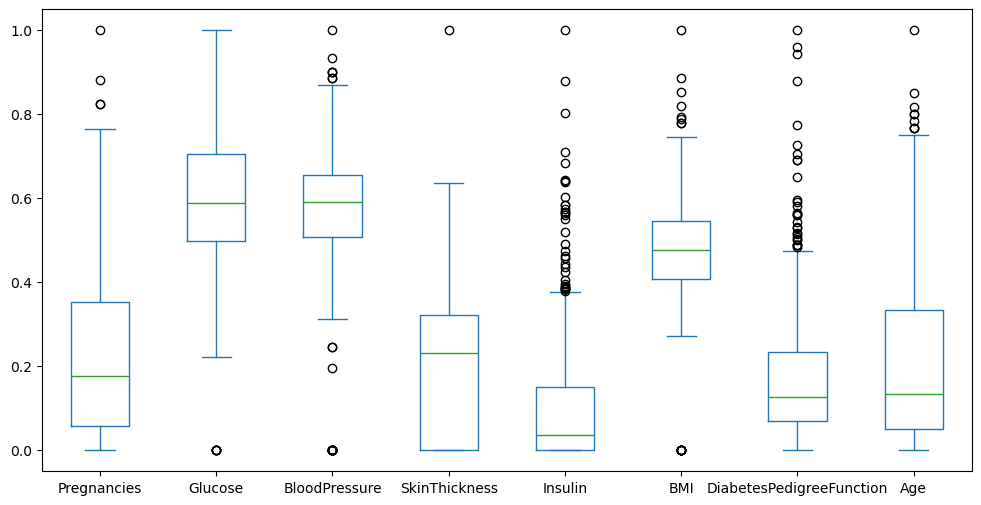

In [55]:
df_clean_minmax[scale_columns].plot(kind="box", figsize=(12,6));

In [56]:
# Standard Normalization
standard_scaler = StandardScaler()
standard_scaler.fit(df_clean[scale_columns])
df_clean_standard = df_clean.copy()
df_clean_standard[scale_columns] = standard_scaler.transform(df_clean[scale_columns])
df_clean_standard

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_encoded
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1,1
...,...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1,1


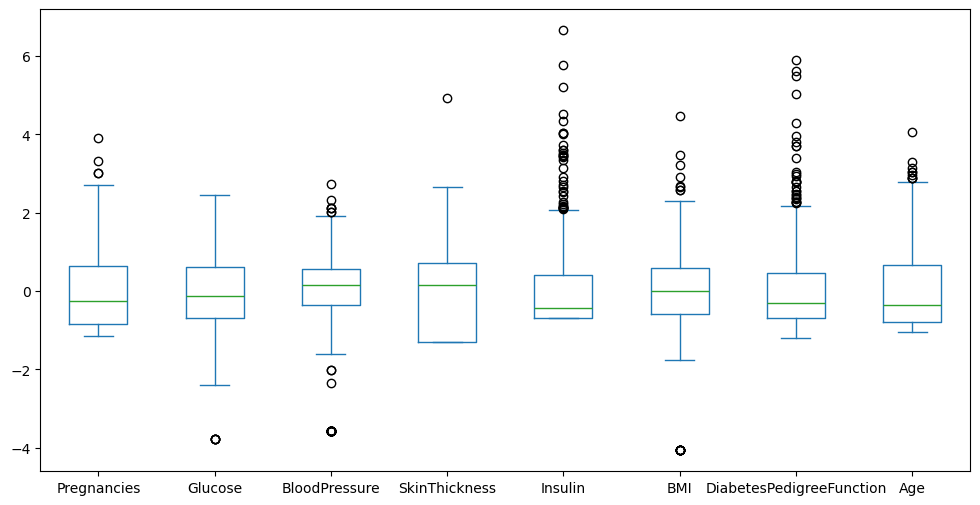

In [57]:
df_clean_standard[scale_columns].plot(kind="box", figsize=(12,6));

In [59]:
from IPython.display import display

correlations = df_clean_standard.corr(method='pearson')
display(correlations)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_encoded
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,1.000000
Outcome_encoded,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,1.000000


#### (4) Chia dữ liệu thực nghiệm

+ Chuyển đổi dữ liệu sang dạng numpy với phần Input (X_data), Output (y_data)
+ Chia dữ liệu thành tập train/test (tỷ lệ 70/30)
+ Lưu tất cả thông tin để chuẩn bị chạy thuật toán

In [62]:
X_data, y_data = df_clean.values[:, :-1], df_clean.values[:, -1]
X_data.shape, y_data.shape
print(X_data[:20, :])
print(y_data[:20])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01 1.000e+00]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01 0.000e+00]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01 1.000e+00]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01 0.000e+00]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01 1.000e+00]
 [5.000e+00 1.160e+02 7.400e+01 0.000e+00 0.000e+00 2.560e+01 2.010e-01
  3.000e+01 0.000e+00]
 [3.000e+00 7.800e+01 5.000e+01 3.200e+01 8.800e+01 3.100e+01 2.480e-01
  2.600e+01 1.000e+00]
 [1.000e+01 1.150e+02 0.000e+00 0.000e+00 0.000e+00 3.530e+01 1.340e-01
  2.900e+01 0.000e+00]
 [2.000e+00 1.970e+02 7.000e+01 4.500e+01 5.430e+02 3.050e+01 1.580e-01
  5.300e+01 1.000e+00]
 [8.000e+00 1.250e+02 9.600e+01 0.000e+00 0.000e+00 0.000e+00 2.320e-01
  5.400e+01 1.000e+00]
 [4.000e+00 1.100e+02 9.200e+01 0.000e+00 0.000e+0

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7)
print(f'+ Train/Test: Train Ratio = {len(X_train)/len(X_data)}')
print(f'+ Train: shape={X_train.shape}\nInput = \n{X_train[:5]}\nOutput = {y_train[:5]}')
print(f'+ Test: shape={X_test.shape}\nInput = \n{X_test[:5]}\nOutput = {y_test[:5]}')

+ Train/Test: Train Ratio = 0.69921875
+ Train: shape=(537, 9)
Input = 
[[  0.    179.     90.     27.      0.     44.1     0.686  23.      1.   ]
 [  7.    114.     66.      0.      0.     32.8     0.258  42.      1.   ]
 [  9.    184.     85.     15.      0.     30.      1.213  49.      1.   ]
 [  6.     80.     66.     30.      0.     26.2     0.313  41.      0.   ]
 [  2.    142.     82.     18.     64.     24.7     0.761  21.      0.   ]]
Output = [1. 1. 1. 0. 0.]
+ Test: shape=(231, 9)
Input = 
[[3.00e+00 1.87e+02 7.00e+01 2.20e+01 2.00e+02 3.64e+01 4.08e-01 3.60e+01
  1.00e+00]
 [1.00e+01 1.22e+02 6.80e+01 0.00e+00 0.00e+00 3.12e+01 2.58e-01 4.10e+01
  0.00e+00]
 [1.00e+00 1.81e+02 6.40e+01 3.00e+01 1.80e+02 3.41e+01 3.28e-01 3.80e+01
  1.00e+00]
 [0.00e+00 1.01e+02 7.60e+01 0.00e+00 0.00e+00 3.57e+01 1.98e-01 2.60e+01
  0.00e+00]
 [1.00e+00 7.30e+01 5.00e+01 1.00e+01 0.00e+00 2.30e+01 2.48e-01 2.10e+01
  0.00e+00]]
Output = [1. 0. 1. 0. 0.]


In [67]:
import os
import joblib

# Lưu thông tin
save_dir = "pima-indians-diabetes-data"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Lưu dữ liệu huấn luyện và kiểm tra
np.savez(f'{save_dir}/data.npz', X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

# Lưu dữ liệu đã làm sạch
df_clean.to_excel(f'{save_dir}/df_clean.xlsx', index=False)

# Lưu bộ mã hóa (encoder)
joblib.dump(outcome_encoder, f'{save_dir}/outcome_encoder.joblib')

# Hiển thị danh sách các tệp đã lưu
print("Các tệp đã lưu:", os.listdir(save_dir))

Các tệp đã lưu: ['data.npz', 'df_clean.xlsx', 'outcome_encoder.joblib']


In [68]:
# Kiểm tra phục hồi dữ liệu
dict(np.load(f'{save_dir}/data.npz')).keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

In [69]:
pd.read_excel(f'{save_dir}/df_clean.xlsx')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome_encoded
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,0
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,1


In [71]:
joblib.load(f'{save_dir}/outcome_encoder.joblib').classes_

array([0, 1])

# Kết thúc